In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from specialist_data import *
from graph_utils import *
from models.stats.context_stats import ContextStats


Evolution EDA

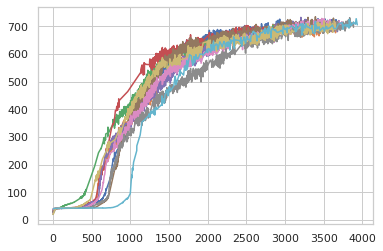

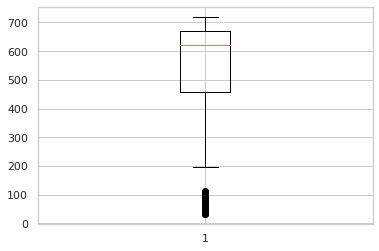

In [2]:
stats = ContextStats('../../data/xdpole', [i+1 for i in range(10)])

s = stats.get_seed(3)
stats.fitness_evolution()

plt.boxplot(s.run_data.avgfit)
plt.show()


Initial Condition EDA

X Boxplots


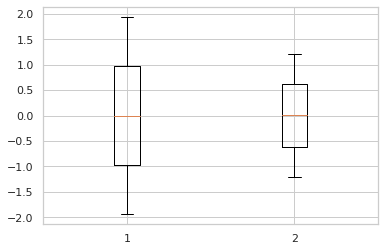

A Boxplots


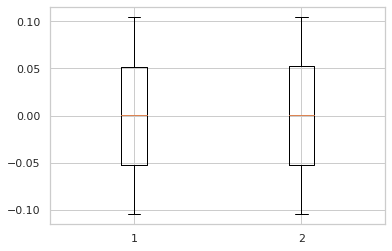

B Boxplots


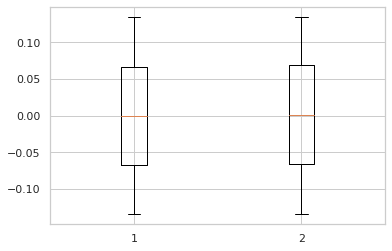

In [3]:
ic_df = transformed.data

print('X Boxplots')
plt.boxplot([ic_df.x1, ic_df.x2], showfliers=False)
plt.show()

print('A Boxplots')
plt.boxplot([ic_df.a1, ic_df.b1], showfliers=False)
plt.show()

print('B Boxplots')
plt.boxplot([ic_df.a2, ic_df.b2], showfliers=False)
plt.show()


Conditions Distribution

In [4]:
last_gens = ic_df.query('index > 10000')

ic_good = last_gens.query('performance == 1000')
ic_bad = last_gens.query('performance < 100')


def dist(col):
    print(col + ' Dist')
    plt.scatter(ic_bad.index, ic_bad[col], s=1, color='orange')
    plt.scatter(ic_good.index, ic_good[col], s=1, color='darkblue')
    plt.show()


print('Last Generations')


# dist('x1')
# dist('x2')
# dist('a1')
# dist('a2')
# dist('b1')
# dist('b2')


Last Generations


In [5]:
first_gens = ic_df.query('index < 10000')

ic_good = first_gens.query('performance > 100')
ic_bad = first_gens.query('performance < 100')

# print('First Generations')

# dist('x1')
# dist('x2')
# dist('a1')
# dist('a2')
# dist('b1')
# dist('b2')


In [6]:
from pandas.plotting import scatter_matrix

# matrix_of_scatterplots = scatter_matrix(
#     transformed.X, alpha=0.2, figsize=(6, 6), diagonal='kde')



Label & Performance Distribution

In [7]:
# generate_hist(ic_df, 'performance')
# generate_hist(ic_df, 'level')


In [8]:
not_bad = ic_df.query('performance > 100')

d1 = not_bad.query('index > 5000 and index < 7000')
d2 = not_bad.query('index > 7000 and index < 8000')
d3 = not_bad.query('index > 8000 and index < 9000')
d4 = not_bad.query('index > 9000 and index < 10000')

divisions = [d1, d2, d3, d4]

# for d in divisions:
    # generate_hist(d, 'performance')


In [9]:
from sklearn.ensemble import RandomForestClassifier  

clf = RandomForestClassifier(max_depth=100, random_state=42) 
def iterate(clf):     
    features = ['x1', 'x2', 'a1', 'a2', 'b1', 'b2'] 
    for i in range(0, 34, 2):         
        train = transformed.data.query(f'index > {i}000 and index < {i+2}000')         
        clf = clf.fit(train[features], train.level)          
        test = transformed.data.query(f'index > {i+2}000 and index < {i+4}000')
        #pred = clf.predict(test[features])         
        result = clf.score(test[features], test.level)
        print(f'gen [{i+2} - {i+4}]: {result}')     
    return clf  
        

clf = iterate(clf) 


gen [2 - 4]: 0.9994997498749375
gen [4 - 6]: 0.8389194597298649
gen [6 - 8]: 0.727863931965983
gen [8 - 10]: 0.817408704352176
gen [10 - 12]: 0.8129064532266133
gen [12 - 14]: 0.8369184592296148
gen [14 - 16]: 0.8444222111055528
gen [16 - 18]: 0.8514257128564282
gen [18 - 20]: 0.8849424712356178
gen [20 - 22]: 0.8639319659829915
gen [22 - 24]: 0.8674337168584292
gen [24 - 26]: 0.8714357178589295
gen [26 - 28]: 0.8829414707353677
gen [28 - 30]: 0.894447223611806
gen [30 - 32]: 0.8774387193596799
gen [32 - 34]: 0.8739369684842421
gen [34 - 36]: 0.8904677323860273


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.